In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_dir = "/content/drive/MyDrive/DataSet/train"
test_dir = "/content/drive/MyDrive/DataSet/test"

In [ ]:
import os
print(os.listdir(train_dir))  # should show emotion folders like angry, happy, sad...


['happy', 'neutral', 'surprised', 'sad', 'angry', 'disgusted', 'fearful']


In [ ]:
img_size = (48, 48)  # FER images are usually 48x48 pixels

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 28721 images belonging to 7 classes.
Found 7190 images belonging to 7 classes.


In [ ]:
print("Class Labels:", train_data.class_indices)


Class Labels: {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


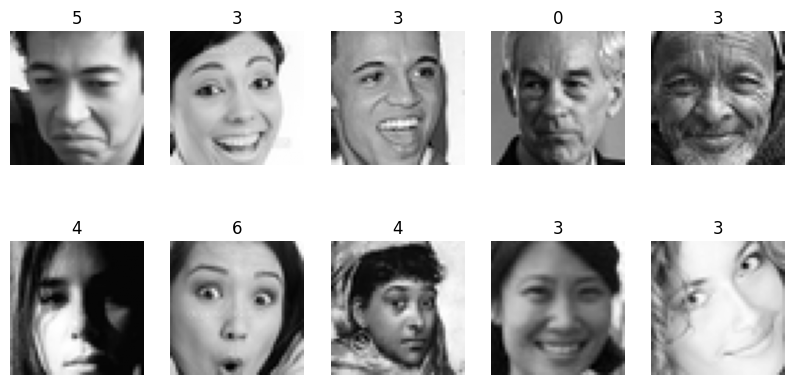

In [ ]:
x, y = next(train_data)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i].reshape(48,48), cmap='gray')
    plt.title(np.argmax(y[i]))
    plt.axis('off')
plt.show()


# EDA

1️⃣ Class Distribution Visualization

/tmp/ipython-input-1588624959.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotions, y=counts, palette="viridis")


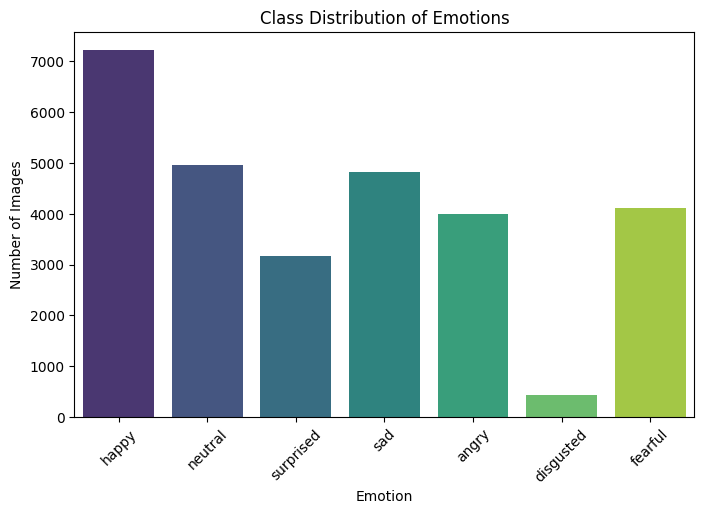

happy: 7215 images
neutral: 4965 images
surprised: 3171 images
sad: 4830 images
angry: 3995 images
disgusted: 436 images
fearful: 4109 images


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = "/content/drive/MyDrive/DataSet/train"

emotions = []
counts = []

for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        emotions.append(folder)
        counts.append(len(os.listdir(folder_path)))

plt.figure(figsize=(8,5))
sns.barplot(x=emotions, y=counts, palette="viridis")
plt.title("Class Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

for e, c in zip(emotions, counts):
    print(f"{e}: {c} images")

#Process:
We count the number of images under each emotion folder (for example, /train/angry, /train/sad, etc.) and plot a bar chart showing the counts.<br>
Expected Observations:<br>
In most facial emotion datasets:<br>
•	Happiness and Neutral have the highest number of samples.<br>
•	Disgust and Fear tend to have fewer examples due to labeling difficulty.<br>
Interpretation:<br>
•	If the distribution is balanced, training will be more stable and unbiased.<br>
•	If it’s imbalanced, techniques like data augmentation, SMOTE (Synthetic Minority Over-sampling Technique), or class-weight adjustment are needed to compensate.<br>
# Why chosen:<br>
This technique gives a clear statistical overview of emotion diversity and helps detect imbalance — a critical issue in emotion recognition tasks.
# Here x-axis is emotion and y-axis is no. of images

2️⃣ Sample Image Visualization (per emotion)

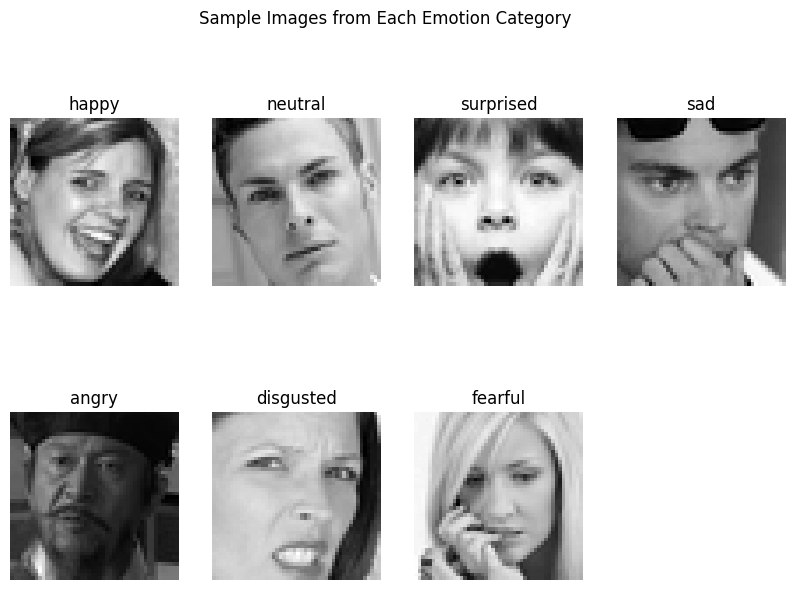

In [ ]:
import cv2
import numpy as np

plt.figure(figsize=(10,7))
for idx, emotion in enumerate(os.listdir(train_dir)):
    img_path = os.path.join(train_dir, emotion, os.listdir(os.path.join(train_dir, emotion))[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(2,4,idx+1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')
plt.suptitle('Sample Images from Each Emotion Category')
plt.show()


# Purpose:
To visually inspect data quality, diversity, and emotion clarity.
This ensures that the dataset truly represents distinct emotions and that images are not misclassified, blurred, or corrupted.
# Process:
A few random samples from each emotion class are plotted side by side in grayscale.<br>
Expected Observations:<br>
•	Angry: furrowed brows, tight lips<br>
•	Happy: visible smiles, open mouth<br>
•	Sad: downturned lips, droopy eyes<br>
•	Surprise: raised eyebrows, wide-open eyes<br>
•	Disgust: wrinkled nose<br>
•	Fear: tense facial muscles<br>
•	Neutral: relaxed face<br>
# Why chosen:
Humans can immediately detect visual irregularities that numbers can’t show — so this step gives contextual validation of the dataset.
Helps visually inspect data quality, variations, and labeling accuracy.


3️⃣ Image Intensity Distribution (Histogram)

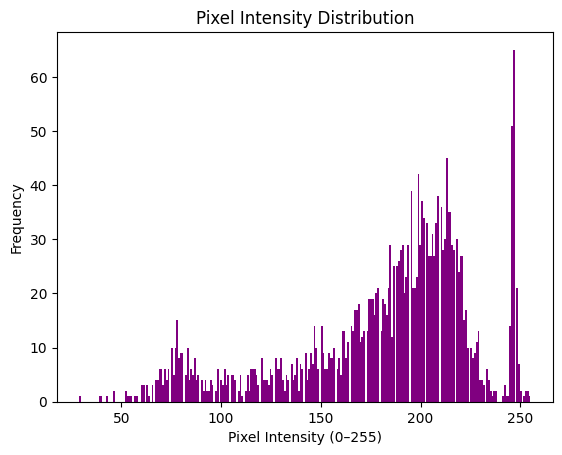

In [ ]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.hist(img.ravel(), bins=256, color='purple')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity (0–255)')
plt.ylabel('Frequency')
plt.show()


# Purpose:
This step analyzes the pixel value distribution (0–255) of images. Since the images are grayscale, their brightness and contrast are entirely determined by pixel intensity.
# Process:
The histogram of pixel values is plotted for a few random images or averaged across the dataset.<br>
Expected Observations:<br>
•	A well-balanced dataset should have a spread-out histogram covering both dark and light tones.<br>
•	A left-skewed histogram indicates that most pixels are dark (low intensity).<br>
•	A right-skewed histogram indicates overly bright images.<br>
# Interpretation:
•	If images are too dark or bright, normalization is needed before feeding into models.<br>
•	Histogram equalization or contrast stretching can improve facial feature clarity.<br>
# Why chosen:
Pixel intensity distribution directly affects feature extraction quality for deep learning models, making this one of the most diagnostic visual tools for image EDA.

Visualizes overall pixel value distribution (0–255) to understand brightness & contrast.
# Here x-axis is pixel intensity and y-axis is frequency

Found 7 emotion folders: ['happy', 'neutral', 'surprised', 'sad', 'angry', 'disgusted', 'fearful']


Processing emotion folders: 100%|██████████| 7/7 [07:19<00:00, 62.85s/it]


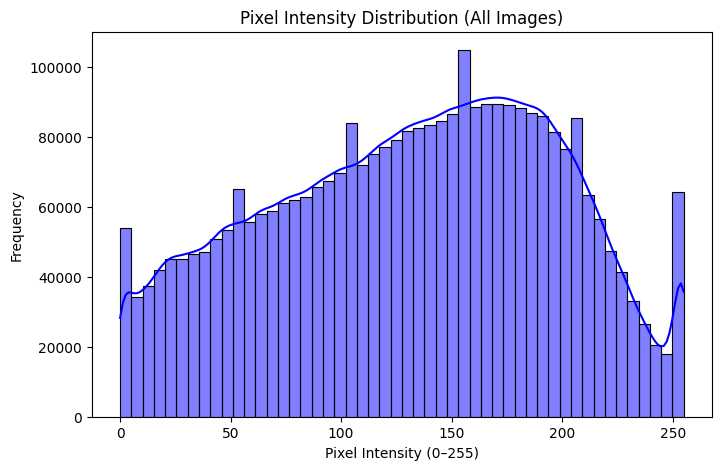

In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm  # progress bar

train_dir = "/content/drive/MyDrive/DataSet/train"

# ✅ Safety check
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")

# Gather pixel data
all_pixels = []

emotions = os.listdir(train_dir)
print(f"Found {len(emotions)} emotion folders:", emotions)

for emotion in tqdm(emotions, desc="Processing emotion folders"):
    folder = os.path.join(train_dir, emotion)
    files = os.listdir(folder)[:200]  # take 200 images per emotion

    for f in tqdm(files, desc=f"{emotion}", leave=False):
        img_path = os.path.join(folder, f)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (48, 48))
            all_pixels.append(img.flatten())

# Convert list of arrays → single NumPy array (faster than repeated .extend)
all_pixels = np.concatenate(all_pixels)

# Plot pixel intensity distribution
plt.figure(figsize=(8, 5))
sns.histplot(all_pixels, bins=50, kde=True, color='blue')
plt.title("Pixel Intensity Distribution (All Images)")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
sample_img = cv2.imread(os.path.join(train_dir, emotions[0], os.listdir(os.path.join(train_dir, emotions[0]))[0]), cv2.IMREAD_GRAYSCALE)
print("Sample image shape:", sample_img.shape)

pixel_values = np.array(all_pixels)
print("Mean Intensity:", np.mean(pixel_values))
print("Std Deviation:", np.std(pixel_values))
print("Min Intensity:", np.min(pixel_values))
print("Max Intensity:", np.max(pixel_values))


Sample image shape: (48, 48)
Mean Intensity: 131.08210999503967
Std Deviation: 64.70597550944785
Min Intensity: 0
Max Intensity: 255


# ML Models

1️⃣ Import Required Libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2️⃣ Define Paths

In [ ]:
train_dir = "/content/drive/MyDrive/DataSet/train"
test_dir = "/content/drive/MyDrive/DataSet/test"
img_size = (48, 48)


3️⃣ Helper Function to Load Images

In [ ]:
def load_data(data_dir, img_size=(48,48), limit_per_class=None):
    X, y = [], []
    for emotion in os.listdir(data_dir):
        folder = os.path.join(data_dir, emotion)
        if not os.path.isdir(folder):
            continue
        files = os.listdir(folder)
        for f in files[:limit_per_class]:  # limit for speed
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img.flatten())
            y.append(emotion)
    return np.array(X), np.array(y)


4️⃣ Load Train & Test Data

In [ ]:
X_train, y_train = load_data(train_dir, img_size, limit_per_class=500)
X_test, y_test = load_data(test_dir, img_size, limit_per_class=500)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Train data shape: (3436, 2304)
Test data shape: (3111, 2304)


5️⃣ Normalize the Data (For SVM, scaling is important)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


6️⃣ Train Model 1 — Support Vector Machine

In [ ]:
svm_model = SVC(kernel='rbf', C=3, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm)

print("🎯 SVM Accuracy:", round(svm_acc*100, 2), "%")
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))


🎯 SVM Accuracy: 34.72 %

SVM Classification Report:
               precision    recall  f1-score   support

       angry       0.29      0.28      0.28       500
   disgusted       0.25      0.56      0.35       111
     fearful       0.28      0.23      0.25       500
       happy       0.41      0.42      0.41       500
     neutral       0.30      0.31      0.30       500
         sad       0.27      0.26      0.26       500
   surprised       0.59      0.54      0.57       500

    accuracy                           0.35      3111
   macro avg       0.34      0.37      0.35      3111
weighted avg       0.35      0.35      0.35      3111



7️⃣ Train Model 2 — Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("🎯 Random Forest Accuracy:", round(rf_acc*100, 2), "%")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


🎯 Random Forest Accuracy: 34.75 %

Random Forest Classification Report:
               precision    recall  f1-score   support

       angry       0.27      0.23      0.25       500
   disgusted       0.45      0.59      0.51       111
     fearful       0.28      0.20      0.23       500
       happy       0.38      0.38      0.38       500
     neutral       0.33      0.33      0.33       500
         sad       0.29      0.29      0.29       500
   surprised       0.46      0.59      0.51       500

    accuracy                           0.35      3111
   macro avg       0.35      0.37      0.36      3111
weighted avg       0.34      0.35      0.34      3111



8️⃣ Compare Model Accuracies

/tmp/ipython-input-990214858.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='viridis')


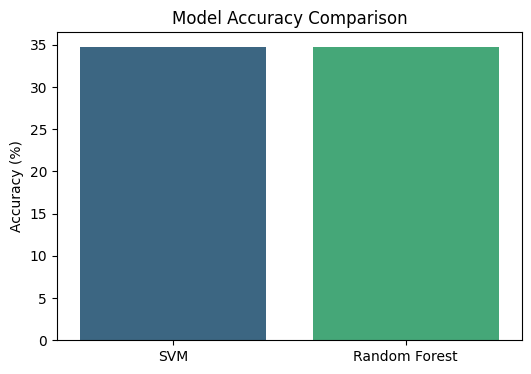


🏆 Random Forest performs better (34.75%)


In [ ]:
models = ['SVM', 'Random Forest']
accuracy = [svm_acc*100, rf_acc*100]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.show()

if svm_acc > rf_acc:
    print(f"\n🏆 SVM performs better ({svm_acc*100:.2f}%)")
else:
    print(f"\n🏆 Random Forest performs better ({rf_acc*100:.2f}%)")


9️⃣ Confusion Matrix for Best Model

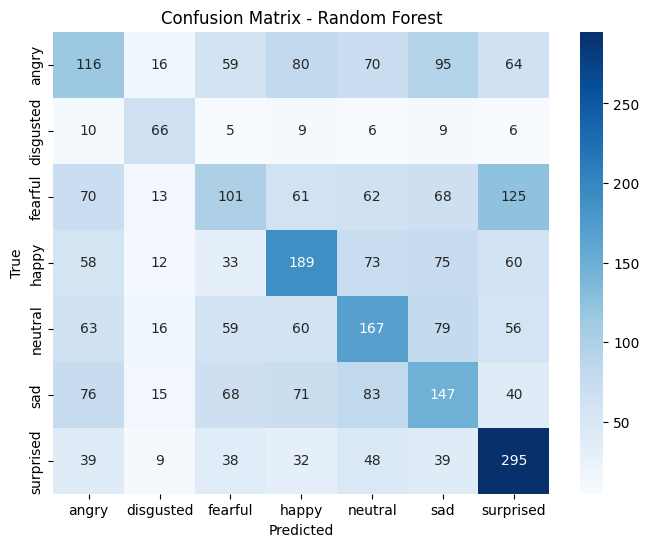

In [ ]:
best_pred = y_pred_svm if svm_acc > rf_acc else y_pred_rf
best_name = "SVM" if svm_acc > rf_acc else "Random Forest"

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f"Confusion Matrix - {best_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# DL Models

In [ ]:
# 📦 Common Setup for All ANN & CNN Models
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# ✅ Define paths
train_dir = "/content/drive/MyDrive/DataSet/train"
test_dir = "/content/drive/MyDrive/DataSet/test"
img_size = (48, 48)

# 📥 Load image data
def load_data(data_dir, img_size=(48,48), limit_per_class=None):
    X, y = [], []
    for emotion in os.listdir(data_dir):
        folder = os.path.join(data_dir, emotion)
        if not os.path.isdir(folder):
            continue
        for i, f in enumerate(os.listdir(folder)):
            if limit_per_class and i >= limit_per_class:
                break
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(emotion)
    return np.array(X), np.array(y)

# Load dataset (limit optional for speed)
X_train, y_train = load_data(train_dir, img_size)
X_test, y_test = load_data(test_dir, img_size)

# Preprocess
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

# Encode labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))

num_classes = y_train_enc.shape[1]
input_dim = X_train.shape[1]

print("✅ Dataset ready | Train:", X_train.shape, " Test:", X_test.shape)
print("Classes:", le.classes_)


✅ Dataset ready | Train: (28721, 2304)  Test: (7190, 2304)
Classes: ['angry' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


## ANN Model 1 – Basic 2-Layer Network

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential([
    Dense(256, input_dim=input_dim, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',        # what metric to watch
    patience=18,                # stop after 10 epochs of no improvement
    restore_best_weights=True  # revert to best model weights
)

history1 = model1.fit(X_train, y_train_enc, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stop])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3175 - loss: 1.6056 - val_accuracy: 0.0117 - val_loss: 8.1248
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4083 - loss: 1.4265 - val_accuracy: 1.7406e-04 - val_loss: 9.1551
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4203 - loss: 1.4045 - val_accuracy: 0.0028 - val_loss: 8.2334
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4389 - loss: 1.3682 - val_accuracy: 0.0019 - val_loss: 9.6044
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4443 - loss: 1.3549 - val_accuracy: 0.0023 - val_loss: 9.6317
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4576 - loss: 1.3211 - val_accuracy: 0.0111 - val_loss: 9.5111
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4634 - loss: 1.3132 - val_accuracy: 0.0082 - val_loss: 9.7729
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4674 - loss: 1.2969 - val_accuracy

## ANN Model 2 – Deeper Network with Dropout

In [ ]:
model2 = Sequential([
    Dense(512, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train_enc, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2768 - loss: 1.6826 - val_accuracy: 0.0000e+00 - val_loss: 6.5351
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3393 - loss: 1.5154 - val_accuracy: 0.0000e+00 - val_loss: 7.3180
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3580 - loss: 1.4779 - val_accuracy: 0.0000e+00 - val_loss: 7.4571
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3705 - loss: 1.4617 - val_accuracy: 0.0000e+00 - val_loss: 7.0965
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3727 - loss: 1.4555 - val_accuracy: 0.0000e+00 - val_loss: 7.8446
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3908 - loss: 1.4421 - val_accuracy: 0.0000e+00 - val_loss: 8.6615
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3894 - loss: 1.4318 - val_accuracy: 0.0000e+00 - val_loss: 8.4000
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3900 - los

## ANN Model 3 – Smaller Network (Faster Training)

In [ ]:
model3 = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train_enc, epochs=8, batch_size=64, validation_split=0.2)


Epoch 1/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3093 - loss: 1.5747 - val_accuracy: 0.0000e+00 - val_loss: 9.8030
Epoch 2/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3930 - loss: 1.4519 - val_accuracy: 0.0014 - val_loss: 9.1891
Epoch 3/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4314 - loss: 1.3963 - val_accuracy: 0.0010 - val_loss: 11.0185
Epoch 4/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4364 - loss: 1.3785 - val_accuracy: 0.0070 - val_loss: 11.6644
Epoch 5/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4443 - loss: 1.3570 - val_accuracy: 0.0035 - val_loss: 11.3876
Epoch 6/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4568 - loss: 1.3243 - val_accuracy: 0.0019 - val_loss: 9.6895
Epoch 7/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4620 - loss: 1.3120 - val_accuracy: 0.0052 - val_loss: 11.3081
Epoch 8/8
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4694 - loss: 1.3013 - val_accuracy: 0.

## ANN Model 4 – Network with He Initialization

In [ ]:
from tensorflow.keras.initializers import HeNormal

model4 = Sequential([
    Dense(512, input_dim=input_dim, activation='relu', kernel_initializer=HeNormal()),
    Dense(256, activation='relu', kernel_initializer=HeNormal()),
    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    Dense(num_classes, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train_enc, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3154 - loss: 1.6402 - val_accuracy: 5.2219e-04 - val_loss: 9.4027
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4094 - loss: 1.4262 - val_accuracy: 0.0014 - val_loss: 9.3392
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4259 - loss: 1.3912 - val_accuracy: 6.9626e-04 - val_loss: 11.5222
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4405 - loss: 1.3584 - val_accuracy: 8.7032e-04 - val_loss: 12.0299
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4453 - loss: 1.3451 - val_accuracy: 0.0113 - val_loss: 9.5731
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4598 - loss: 1.3249 - val_accuracy: 0.0047 - val_loss: 10.6374
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4540 - loss: 1.3179 - val_accuracy: 0.0063 - val_loss: 9.9428
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4675 - loss: 1.3007 - v

## ANN Model 5 – Wide Network with Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model5 = Sequential([
    Dense(512, input_dim=input_dim, activation='relu'),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train_enc, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3628 - loss: 1.5898 - val_accuracy: 0.0259 - val_loss: 7.6790
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4314 - loss: 1.3868 - val_accuracy: 0.0205 - val_loss: 7.5055
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4709 - loss: 1.2897 - val_accuracy: 0.0038 - val_loss: 10.3766
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4930 - loss: 1.2424 - val_accuracy: 0.0261 - val_loss: 11.2143
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4976 - loss: 1.2203 - val_accuracy: 0.0590 - val_loss: 11.4664
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5232 - loss: 1.1689 - val_accuracy: 0.0071 - val_loss: 11.1010
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5318 - loss: 1.1541 - val_accuracy: 0.0202 - val_loss: 9.5403
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5470 - loss: 1.1248 - val_accuracy

## CNN Model – For Image-Based Feature Learning

In [ ]:
# Reshape back to 48x48x1 for CNN
X_train_cnn = X_train.reshape(-1, 48, 48, 1)
X_test_cnn = X_test.reshape(-1, 48, 48, 1)

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train_cnn, y_train_enc, epochs=10, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3580 - loss: 1.5115 - val_accuracy: 0.0111 - val_loss: 5.9588
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5262 - loss: 1.1808 - val_accuracy: 0.0275 - val_loss: 7.3793
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5940 - loss: 1.0345 - val_accuracy: 0.0597 - val_loss: 8.1783
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6309 - loss: 0.9462 - val_accuracy: 0.0538 - val_loss: 9.4360
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6592 - loss: 0.8776 - val_accuracy: 0.0627 - val_loss: 9.1501
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6906 - loss: 0.8080 - val_accuracy: 0.0526 - val_loss: 9.8353
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7197 - loss: 0.7364 - val_accuracy: 0.0695 - val_loss: 10.2131
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7450 - loss: 0.6725 - val_accuracy: 

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.541307371349096

Classification Report:
               precision    recall  f1-score   support

       angry       0.49      0.40      0.44       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.00      0.00      0.00      1024
       happy       0.73      0.80      0.76      1774
     neutral       0.49      0.55      0.52      1245
         sad       0.38      0.59      0.46      1247
   surprised       0.60      0.82      0.69       831

    accuracy                           0.54      7190
   macro avg       0.38      0.45      0.41      7190
weighted avg       0.46      0.54      0.50      7190



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


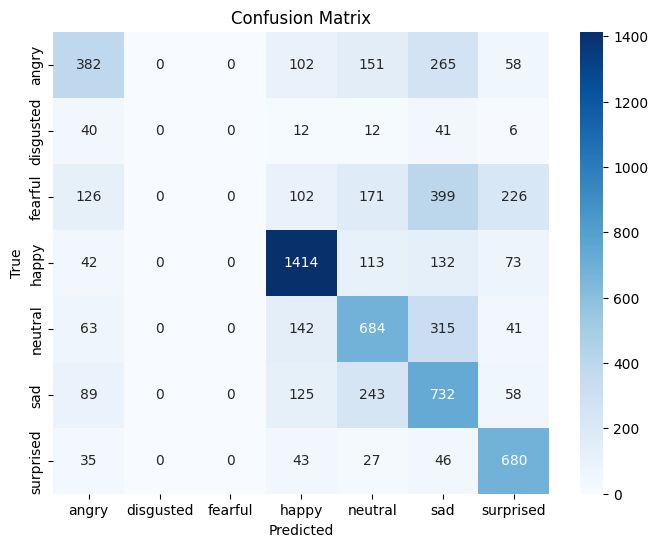

In [ ]:
y_pred = cnn_model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_true, y_pred_labels, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Improved CNN

Found 28721 images belonging to 7 classes.
Found 7190 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 128s 271ms/step - accuracy: 0.2204 - loss: 2.5861 - val_accuracy: 0.2213 - val_loss: 1.8445
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 112s 250ms/step - accuracy: 0.2489 - loss: 1.8130 - val_accuracy: 0.2477 - val_loss: 1.7768
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 110s 245ms/step - accuracy: 0.2524 - loss: 1.7968 - val_accuracy: 0.2572 - val_loss: 1.8836
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 110s 245ms/step - accuracy: 0.2661 - loss: 1.7759 - val_accuracy: 0.2751 - val_loss: 1.7121
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 111s 248ms/step - accuracy: 0.2664 - loss: 1.7742 - val_accuracy: 0.2974 - val_loss: 1.7073
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 113s 251ms/step - accuracy: 0.2720 - loss: 1.7508 - val_accuracy: 0.3106 - val_loss: 1.6500
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 110s 245ms/step - accuracy: 0.2752 - loss: 1.7395 - val_accuracy: 0.2968 - val_loss: 1.8738
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 109s 243ms/step - accuracy: 0.2775 -

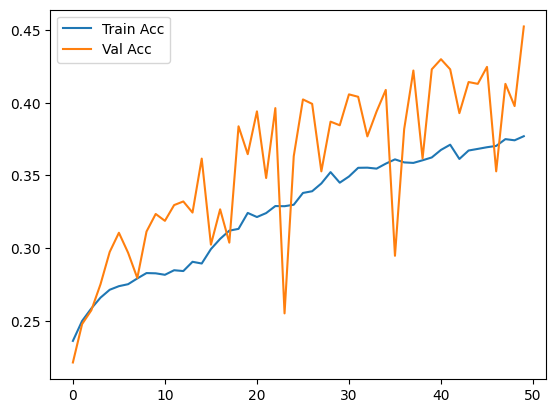

In [ ]:
# ==============================
# 1️⃣ Improved Custom CNN Model
# ==============================

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Paths
train_dir = "/content/drive/MyDrive/DataSet/train"
test_dir = "/content/drive/MyDrive/DataSet/test"
img_size = (48, 48)
batch_size = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, color_mode='grayscale', batch_size=batch_size, class_mode='categorical'
)
test_gen = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, color_mode='grayscale', batch_size=batch_size, class_mode='categorical'
)

# Build Model
model_bn = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax')
])

model_bn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_bn = model_bn.fit(train_gen, validation_data=test_gen, epochs=50, callbacks=[early_stop])

# Evaluate
loss, acc = model_bn.evaluate(test_gen)
print(f"✅ Improved CNN Accuracy: {acc*100:.2f}%")

# Plot
plt.plot(history_bn.history['accuracy'], label='Train Acc')
plt.plot(history_bn.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.show()


## VGG16

In [ ]:
# ==============================
# 2️⃣ VGG16 Transfer Learning
# ==============================

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data generators (3-channel needed for VGG)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(48,48),
                                              color_mode='rgb', batch_size=32, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(48,48),
                                            color_mode='rgb', batch_size=32, class_mode='categorical')

# Load base model
base_vgg = VGG16(include_top=False, weights='imagenet', input_shape=(48,48,3))
for layer in base_vgg.layers[:-4]:  # freeze most layers, fine-tune last 4
    layer.trainable = False

x = Flatten()(base_vgg.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)
model_vgg = Model(inputs=base_vgg.input, outputs=output)

# Compile
model_vgg.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_vgg = model_vgg.fit(train_gen, validation_data=test_gen, epochs=30, callbacks=[early_stop])

# Evaluate
loss, acc = model_vgg.evaluate(test_gen)
print(f"✅ VGG16 Fine-tuned Accuracy: {acc*100:.2f}%")


Found 28721 images belonging to 7 classes.
Found 7190 images belonging to 7 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 169s 180ms/step - accuracy: 0.2948 - loss: 1.7612 - val_accuracy: 0.4271 - val_loss: 1.5103
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 136s 151ms/step - accuracy: 0.4014 - loss: 1.5527 - val_accuracy: 0.4542 - val_loss: 1.4387
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 165s 177ms/step - accuracy: 0.4437 - loss: 1.4700 - val_accuracy: 0.4794 - val_loss: 1.3493
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 149ms/step - accuracy: 0.4607 - loss: 1.4145 - val_accuracy: 0.4829 - val_loss: 1.3381
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 132s 147ms/step - accuracy: 0.4677 - loss: 1.3895 - val_accuracy: 0.5157 - val_loss: 1.2756
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.4895 - loss: 1.3553 - val_accuracy: 0.5166 - val_loss: 1.2741
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 136s 151ms/step - accuracy: 0.50

## ResNet50

In [ ]:
# ==============================
# 3️⃣ ResNet50 Transfer Learning
# ==============================

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(48,48),
                                              color_mode='rgb', batch_size=32, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(48,48),
                                            color_mode='rgb', batch_size=32, class_mode='categorical')

# Load ResNet50
base_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(48,48,3))
for layer in base_resnet.layers[:-10]:  # fine-tune last 10 layers
    layer.trainable = False

x = GlobalAveragePooling2D()(base_resnet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)
model_resnet = Model(inputs=base_resnet.input, outputs=output)

# Compile
model_resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_resnet = model_resnet.fit(train_gen, validation_data=test_gen, epochs=30, callbacks=[early_stop])

# Evaluate
loss, acc = model_resnet.evaluate(test_gen)
print(f"✅ ResNet50 Fine-tuned Accuracy: {acc*100:.2f}%")

Found 28721 images belonging to 7 classes.
Found 7190 images belonging to 7 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 194s 199ms/step - accuracy: 0.2600 - loss: 1.8166 - val_accuracy: 0.2693 - val_loss: 1.8655
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 133s 149ms/step - accuracy: 0.3069 - loss: 1.7217 - val_accuracy: 0.3252 - val_loss: 1.7334
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 130s 145ms/step - accuracy: 0.3178 - loss: 1.6994 - val_accuracy: 0.3131 - val_loss: 1.7326
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 130s 145ms/step - accuracy: 0.3337 - loss: 1.6854 - val_accuracy: 0.3164 - val_loss: 1.6714
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 132s 147ms/step - accuracy: 0.3429 - loss: 1.6702 - val_accuracy: 0.2526 - val_loss: 1.7582
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 132s 147ms/step - accuracy: 0.3391 - loss: 1.6698 - val_accuracy: 0.2876 - val_loss: 1.7786
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 130s 145ms/step - accuracy: 0.34

KeyboardInterrupt: 

# Results

## Evaluate All Models

In [ ]:
# ============================================
# 📊 Model Evaluation & Comparison (FINAL)
# ============================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# ==============================
# 🔹 1. Metric Calculation Helper
# ==============================
def evaluate_model(name, y_true, y_pred, model_results):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    model_results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision": round(prec * 100, 2),
        "Recall": round(rec * 100, 2),
        "F1-Score": round(f1 * 100, 2)
    })
    return model_results


# ==========================================
# 🔹 2. Convert One-Hot Encoded Labels to Int
# ==========================================
y_true_dl = np.argmax(y_test_enc, axis=1)


# ==========================================
# 🔹 3. Unified DL Evaluation Function
# ==========================================
def eval_dl_model(model, name):

    input_shape = model.input_shape

    # ANN case → input shape (None, features)
    if len(input_shape) == 2:
        preds = model.predict(X_test)

    # CNN / VGG / ResNet case
    elif len(input_shape) == 4:
        _, H, W, C = input_shape

        # Reshape X_test into images
        X_input = X_test.reshape(-1, H, W, C)
        preds = model.predict(X_input)

    else:
        raise ValueError(f"Unsupported input shape: {input_shape}")

    y_pred = np.argmax(preds, axis=1)
    return evaluate_model(name, y_true_dl, y_pred, model_results)


# ==========================================
# 🔹 4. ML Evaluation Function
# ==========================================
def eval_ml_model(model, name, X_test, y_test):
    preds = model.predict(X_test)
    return evaluate_model(name, y_test, preds, model_results)


# ==========================================
# ✅ 5. Initialize Results List
# ==========================================
model_results = []


# ==========================================
# 🧠 6. ANN Models
# ==========================================
model_results = eval_dl_model(model1, "ANN Model 1")
model_results = eval_dl_model(model2, "ANN Model 2")
model_results = eval_dl_model(model3, "ANN Model 3")
model_results = eval_dl_model(model4, "ANN Model 4")
model_results = eval_dl_model(model5, "ANN Model 5")


# ==========================================
# 🧩 7. CNN Models
# ==========================================
model_results = eval_dl_model(cnn_model, "Base CNN")
model_results = eval_dl_model(model_bn, "CNN + BatchNorm + Dropout")


# ==========================================
# 🧬 8. Transfer Learning Models
# ==========================================
#model_results = eval_dl_model(model_vgg, "VGG16 Fine-tuned")
#model_results = eval_dl_model(model_resnet, "ResNet50 Fine-tuned")


# ==========================================
# 🧮 9. Machine Learning Models
# ==========================================
model_results = eval_ml_model(svm_model, "SVM Classifier", X_test, y_test)
model_results = eval_ml_model(rf_model, "Random Forest Classifier", X_test, y_test)


# ==========================================
# 📊 10. Display & Export Results
# ==========================================
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Convert to % strings
for col in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    results_df[col] = results_df[col].astype(str) + "%"

print("✅ Model Comparison Summary:")
display(results_df)

# Save to CSV
results_df.to_csv("model_comparison_results.csv", index=False)
print("\n📁 Results saved to 'model_comparison_results.csv'")


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ Model Comparison Summary:


,Model,Accuracy,Precision,Recall,F1-Score
0,Base CNN,54.13%,46.45%,54.13%,49.57%
1,CNN + BatchNorm + Dropout,42.31%,35.32%,42.31%,35.89%
2,ANN Model 4,37.94%,32.83%,37.94%,32.66%
3,ANN Model 3,35.03%,29.9%,35.03%,27.55%
4,ANN Model 1,34.3%,28.35%,34.3%,28.17%
5,ANN Model 5,30.65%,34.69%,30.65%,27.69%
6,ANN Model 2,30.57%,22.48%,30.57%,25.5%
7,SVM Classifier,21.68%,30.12%,21.68%,17.05%
8,Random Forest Classifier,17.34%,3.01%,17.34%,5.13%



📁 Results saved to 'model_comparison_results.csv'


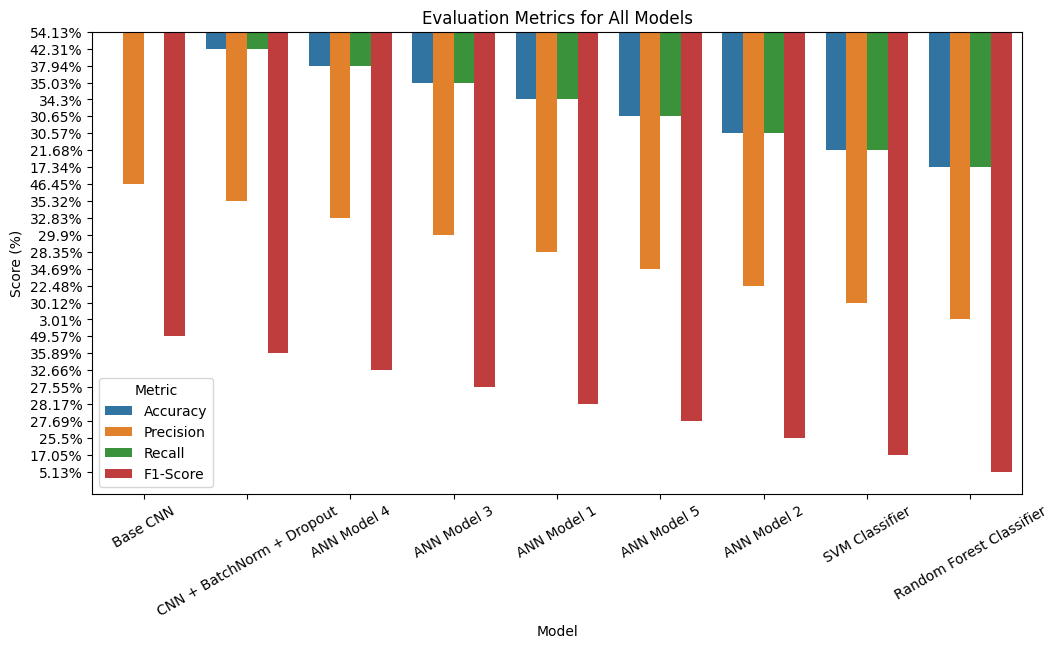

In [ ]:
results_melt = results_df.melt(id_vars=["Model"], value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                               var_name="Metric", value_name="Score")

plt.figure(figsize=(12,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melt)
plt.title("Evaluation Metrics for All Models")
plt.xticks(rotation=30)
plt.ylabel("Score (%)")
plt.legend(title="Metric")
plt.show()


In [ ]:
best_model = results_df.iloc[0]
print(f"🏆 Best Model: {best_model['Model']} with Accuracy = {best_model['Accuracy']}%")


🏆 Best Model: Base CNN with Accuracy = 54.13%%


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)


In [ ]:
# If X_test is flat, reshape to images
if len(X_test.shape) == 2:
    X_test_reshaped = X_test.reshape(-1, 48, 48, 1)
else:
    X_test_reshaped = X_test


In [ ]:
X_test_rgb = np.repeat(X_test_reshaped, 3, axis=-1)
print("X_test_rgb shape:", X_test_rgb.shape)


X_test_rgb shape: (7190, 48, 48, 3)


In [ ]:
# ============================================
# 💠 VGG16 Evaluation - FIXED VERSION
# ============================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# ---- 1️⃣ Fix labels globally ----
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

def eval_vgg_model(model, name):

    print(f"\n🔎 Evaluating: {name}")

    # ---- 2️⃣ Ensure image shape ----
    if len(X_test.shape) == 2:
        X_test_img = X_test.reshape(-1, 48, 48, 1)
    else:
        X_test_img = X_test

    # ---- 3️⃣ Convert grayscale to RGB ----
    X_input = np.repeat(X_test_img, 3, axis=-1)

    # ---- 4️⃣ Predict ----
    preds = model.predict(X_input)
    y_pred = np.argmax(preds, axis=1)

    # ---- 5️⃣ Compute metrics ----
    acc  = accuracy_score(y_test_encoded, y_pred)
    prec = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    f1   = f1_score(y_test_encoded, y_pred, average='weighted', zero_division=0)

    result = {
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision": round(prec * 100, 2),
        "Recall": round(rec * 100, 2),
        "F1-Score": round(f1 * 100, 2)
    }

    print(f"✔ Done evaluating {name}")
    return result


In [ ]:
vgg_result = eval_vgg_model(model_vgg, "VGG16 Fine-Tuned")
pd.DataFrame([vgg_result])



🔎 Evaluating: VGG16 Fine-Tuned
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
✔ Done evaluating VGG16 Fine-Tuned


,Model,Accuracy,Precision,Recall,F1-Score
0,VGG16 Fine-Tuned,55.88,56.96,55.88,55.84


In [ ]:
import pandas as pd

# ----------------------------------------------------
# 1️⃣ Load the existing results file
# ----------------------------------------------------
df = pd.read_csv("model_comparison_results.csv")

# ----------------------------------------------------
# 2️⃣ Convert numeric columns back to float
# ----------------------------------------------------
for col in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    df[col] = df[col].astype(str).str.replace("%", "").astype(float)

# ----------------------------------------------------
# 3️⃣ Remove old VGG entries
# ----------------------------------------------------
df = df[df["Model"] != "VGG16 Fine-Tuned"]

# ----------------------------------------------------
# 4️⃣ Insert the correct VGG result
# ----------------------------------------------------
df.loc[len(df)] = [
    "VGG16 Fine-Tuned",   # Model Name
    55.88,                # Accuracy
    56.96,                # Precision
    55.88,                # Recall
    55.84                 # F1-score
]

# ----------------------------------------------------
# 5️⃣ Sort by accuracy (descending)
# ----------------------------------------------------
df = df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# ----------------------------------------------------
# 6️⃣ Convert back to percentage format
# ----------------------------------------------------
for col in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    df[col] = df[col].astype(str) + "%"

# ----------------------------------------------------
# 7️⃣ Display final cleaned table
# ----------------------------------------------------
print("🎯 Cleaned Model Comparison Table:")
display(df)

# ----------------------------------------------------
# 8️⃣ Save cleaned file
# ----------------------------------------------------
df.to_csv("model_comparison_results_clean.csv", index=False)
print("\n📁 Final cleaned table saved as 'model_comparison_results_clean.csv'")


🎯 Cleaned Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score
0,VGG16 Fine-Tuned,55.88%,56.96%,55.88%,55.84%
1,Base CNN,54.13%,46.45%,54.13%,49.57%
2,CNN + BatchNorm + Dropout,42.31%,35.32%,42.31%,35.89%
3,ANN Model 4,37.94%,32.83%,37.94%,32.66%
4,ANN Model 3,35.03%,29.9%,35.03%,27.55%
5,ANN Model 1,34.3%,28.35%,34.3%,28.17%
6,ANN Model 5,30.65%,34.69%,30.65%,27.69%
7,SVM Classifier,21.68%,30.12%,21.68%,17.05%
8,Random Forest Classifier,17.34%,3.01%,17.34%,5.13%



📁 Final cleaned table saved as 'model_comparison_results_clean.csv'
